<a href="https://colab.research.google.com/github/Masud581/Final-Year-Project/blob/main/ML%20Final%20Code%20copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Gaming_dataset.xlsx to Gaming_dataset (3).xlsx


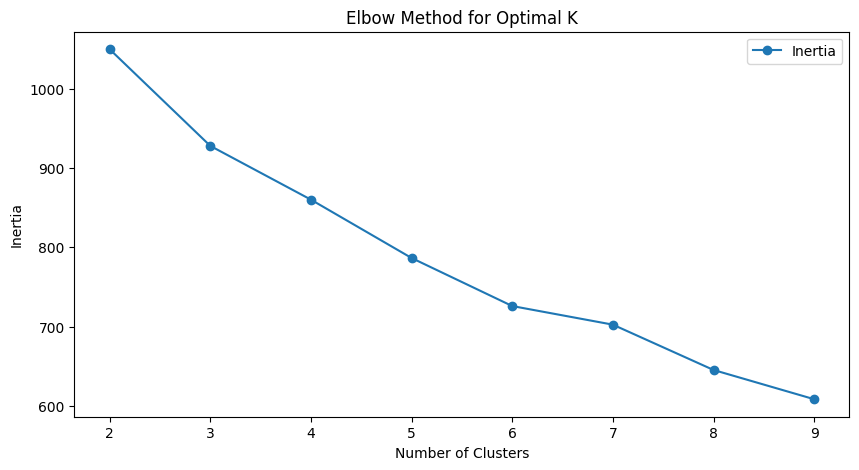

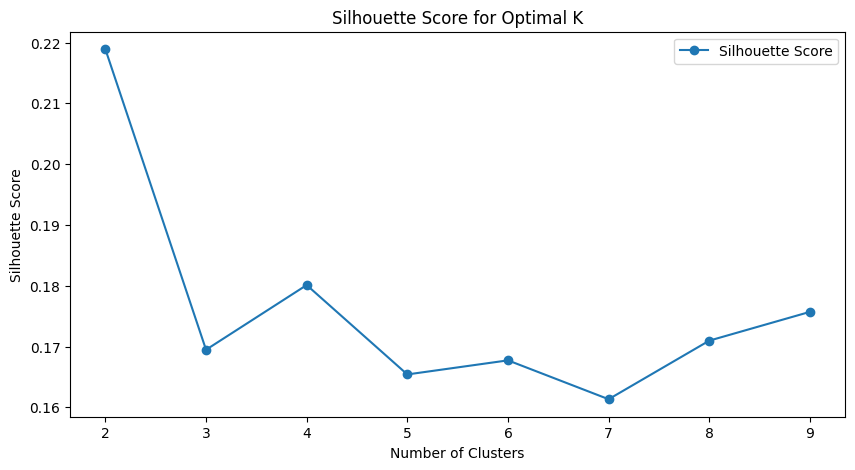

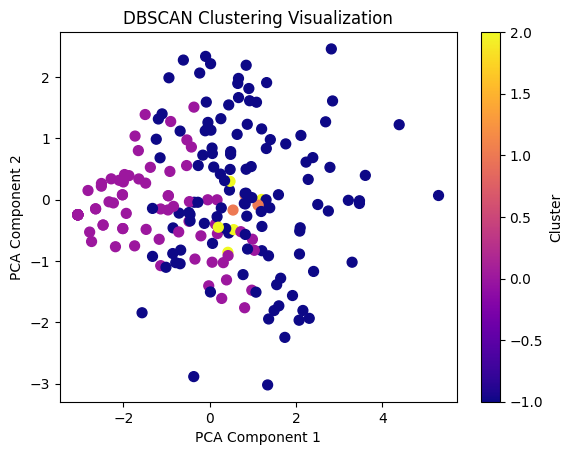

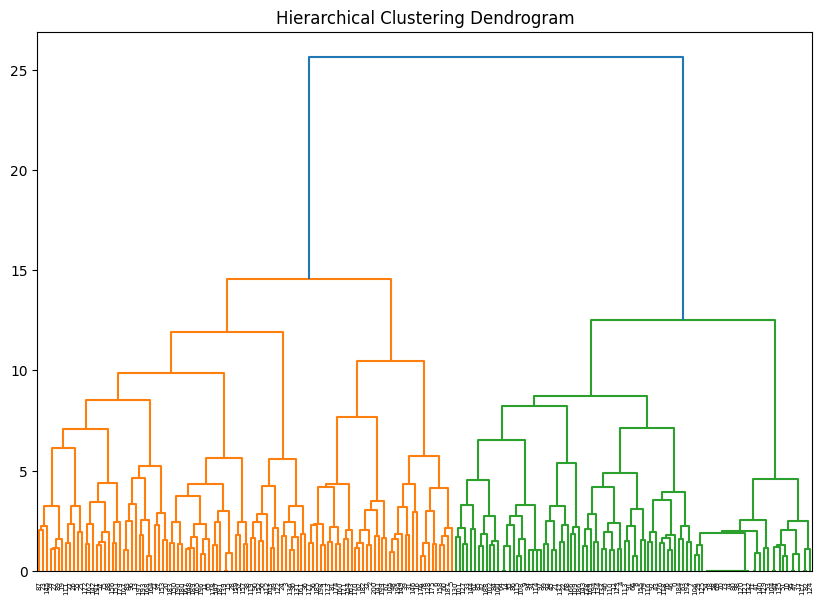

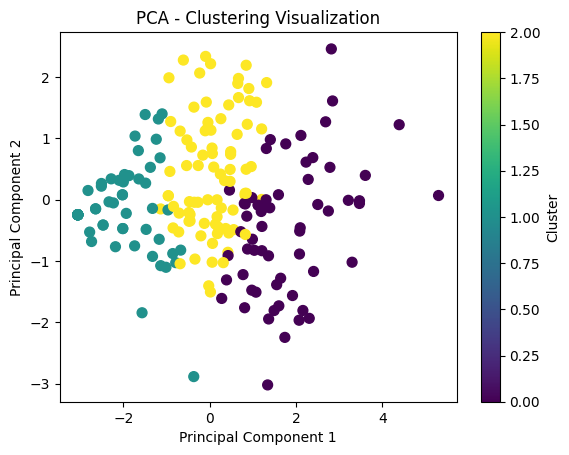

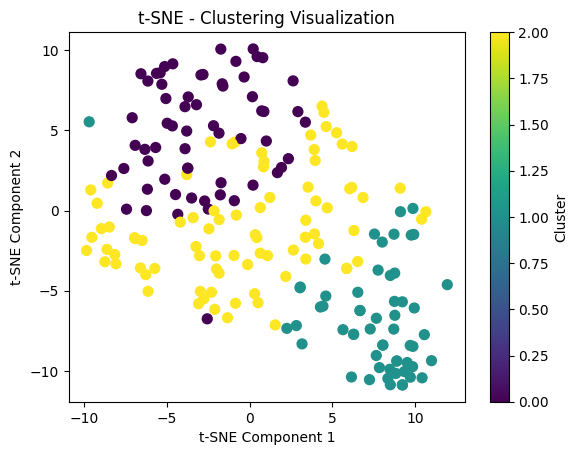

Regression Coefficients: [1.08412058 1.27330142 1.3335932  1.36262108 1.34736803 1.18856544
 1.33559621]


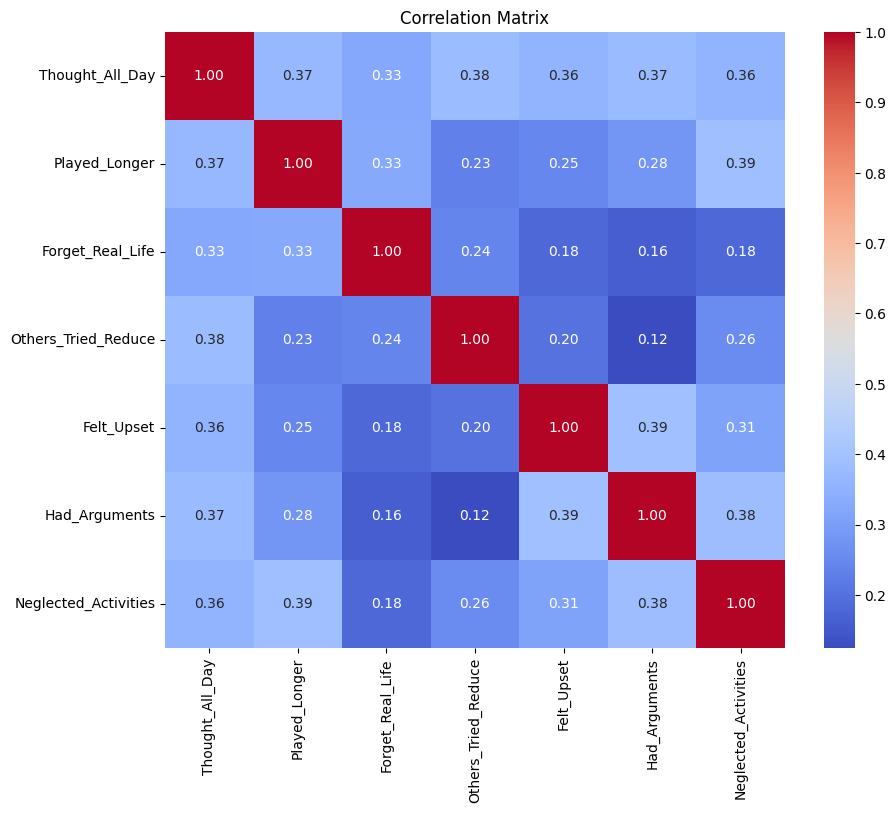

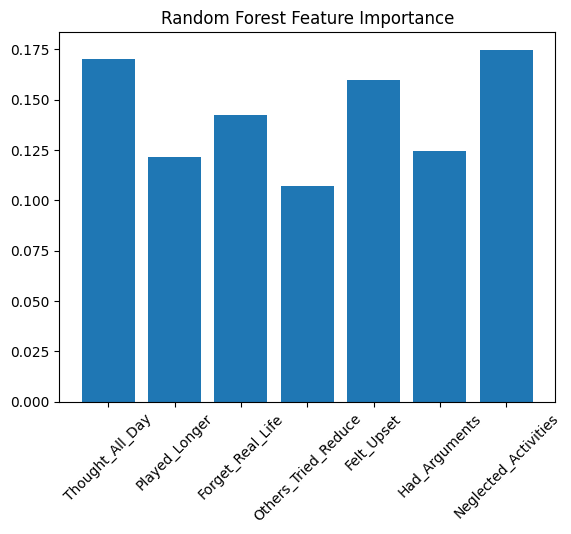

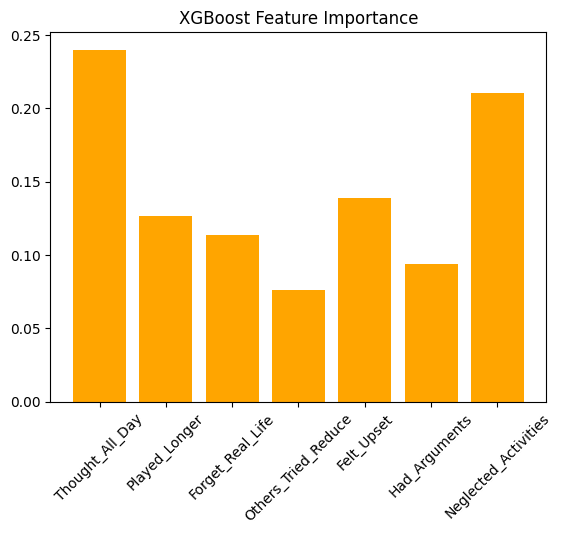

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analysis results saved to gaming_addiction_analysis_results.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.metrics import silhouette_score
from google.colab import files

# Upload the dataset from local system
uploaded = files.upload()

# Load the uploaded file
data = pd.read_excel(next(iter(uploaded.keys())))

# Strip any leading/trailing spaces from column names to avoid KeyError
data.columns = data.columns.str.strip()

# Rename columns for simplicity
renamed_columns = {
    '1. Have you thought all day long about playing a game?': 'Thought_All_Day',
    '2. Have you played longer than intended?': 'Played_Longer',
    '3. Have you played games to forget about real life?': 'Forget_Real_Life',
    '4. Have other unsuccessfully tried to reduce your time spent on games?': 'Others_Tried_Reduce',
    '5. Have you felt upset when you were unable to play?': 'Felt_Upset',
    '6. Have you had arguments with others (e.g., family,\nfriends) over your time spent on games?': 'Had_Arguments',
    '7. Have you neglected important activities (e.g., school, work, sports) to play games?': 'Neglected_Activities'
}
data.rename(columns=renamed_columns, inplace=True)

# Define parameters for analysis
parameters = list(renamed_columns.values())

# Standardize the data for clustering and PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[parameters])

### (a) Clustering ###
# K-Means Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, 'o-', label='Inertia')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'o-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# K-Means Clustering (Optimal K)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# PCA for DBSCAN Visualization
pca = PCA(n_components=2)
pca_result_dbscan = pca.fit_transform(data_scaled)

plt.scatter(pca_result_dbscan[:, 0], pca_result_dbscan[:, 1], c=data['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### (b) Dimensionality Reduction ###
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('PCA - Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('t-SNE - Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

### (c) Regression Analysis ###
# Define Addiction Score
data['Addiction_Score'] = data[parameters].sum(axis=1)

# Linear Regression
regressor = LinearRegression()
regressor.fit(data_scaled, data['Addiction_Score'])
print('Regression Coefficients:', regressor.coef_)

### (d) Correlation Analysis ###
correlation_matrix = data[parameters].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### (e) Feature Importance ###
# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
data['Addiction_Level'] = pd.qcut(data['Addiction_Score'], q=3, labels=['Low', 'Moderate', 'High'])
rf.fit(data_scaled, data['Addiction_Level'])
importances_rf = rf.feature_importances_
plt.bar(parameters, importances_rf)
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()

# XGBoost Feature Importance
# Convert categorical labels to numerical.3
data['Addiction_Level_Num'] = data['Addiction_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(data_scaled, data['Addiction_Level_Num'])
importances_xgb = xgb.feature_importances_
plt.bar(parameters, importances_xgb, color='orange')
plt.title('XGBoost Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Save the results
data.to_csv('gaming_addiction_analysis_results.csv', index=False)
files.download('gaming_addiction_analysis_results.csv')
print('Analysis results saved to gaming_addiction_analysis_results.csv')
